In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


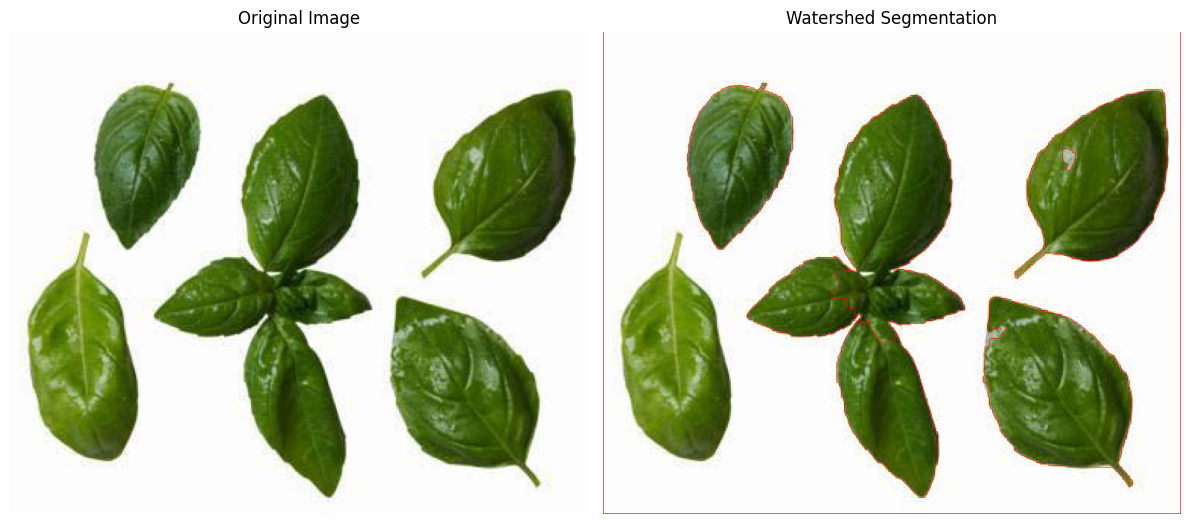

In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read the image
path = '/content/drive/My Drive/images/basil.png'
img = cv2.imread(path)
original = img.copy()  # For comparison later

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding with inverse binary
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Remove noise using morphological opening
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Get sure background by dilation
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Get sure foreground using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Identify unknown region (neither sure foreground nor background)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Label connected components in sure foreground
ret, markers = cv2.connectedComponents(sure_fg)

# Adjust markers for watershed
markers = markers + 1
markers[unknown == 255] = 0  # Unknown region set to 0

# Apply watershed algorithm
markers = cv2.watershed(img, markers)

# Mark watershed boundaries in red
img[markers == -1] = [0, 0, 255]

# Display original and segmented images side by side
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Watershed Segmentation')
plt.axis('off')

plt.tight_layout()
plt.show()
